In [1]:
'''
Jan 14, 2017
CPM
NBA_shot_logs

Add player position information.

https://www.kaggle.com/dansbecker/nba-shot-logs
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model.miss_match import off_mm_PG,off_mm_SG,off_mm_SF,off_mm_PF,off_mm_C
from model.miss_match import def_mm_PG,def_mm_SG,def_mm_SF,def_mm_PF,def_mm_C
%matplotlib inline

In [2]:
df = pd.read_csv('data\shot_logs_pos.csv')
df_features = df[['GAME_ID','MATCHUP','W','FGM','PTS_TYPE','CLOSE_DEF_DIST',
				'player_name','player_pos', 'player_pos_ID','CLOSEST_DEFENDER' ,'CD_pos',
				'CD_pos_ID']]
	   
df_features.reset_index(drop=True,inplace=True)

In [3]:
df_PG = df_features.copy()
df_SG = df_features.copy()
df_SF = df_features.copy()
df_PF = df_features.copy()
df_C = df_features.copy()

player_p = ['PG','SG','PF','SF','C']
off_methods = [off_mm_PG,off_mm_SG,off_mm_SF,off_mm_PF,off_mm_C]
def_methods = [def_mm_PG,def_mm_SG,def_mm_SF,def_mm_PF,def_mm_C]
dataframes = [df_PG,df_SG,df_SF,df_PF,df_C]

In [4]:
off = []
for position,dataframe,off_method in zip(player_p,dataframes, off_methods):
    dftemp = dataframe[dataframe['player_pos'] == position]
    dftemp['miss match'] = dftemp['CD_pos_ID'].apply(off_method)
    off.append(dftemp)

C:\Users\54419\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
player_PG = off[0].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_SG = off[1].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_SF = off[2].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_PF = off[3].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_C = off[4].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])

In [6]:
pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1)

player_pos                 PG        SG        PF        SF         C
miss match PTS_TYPE                                                  
0          2         0.462553  0.466229  0.496930  0.477241  0.506305
           3         0.344518  0.365078  0.340953  0.357765  0.320707
1          2         0.479912  0.469087  0.512375  0.527434  0.590555
           3         0.326908  0.376289  0.351423  0.353018  0.346667

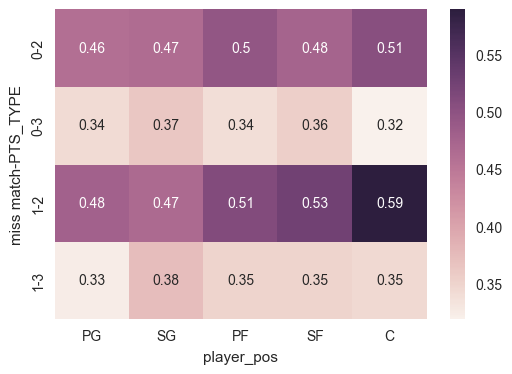

In [7]:
sns.heatmap(pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1),annot=True)

In [8]:
player_PG = off[0].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'],aggfunc='count')
player_SG = off[1].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'],aggfunc='count')
player_SF = off[2].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'],aggfunc='count')
player_PF = off[3].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'],aggfunc='count')
player_C = off[4].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos'],aggfunc='count')

In [9]:
pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1)

player_pos              PG     SG     PF     SF      C
miss match PTS_TYPE                                   
0          2         13339  12807  14821  11468  16812
           3          7451   8642   3631   6549    396
1          2          5426   1763   6384   1130   2054
           3          1245    388   1124    762     75

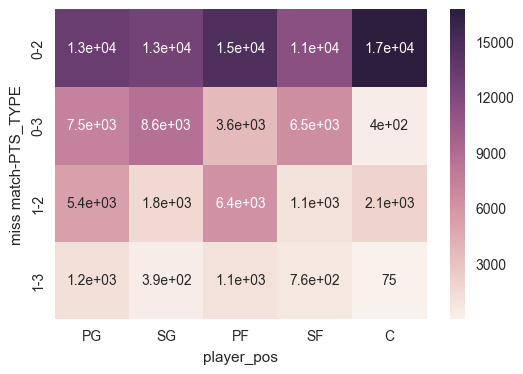

In [10]:
sns.heatmap(pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1),annot=True)

In [11]:
player_PG = off[0].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_SG = off[1].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_SF = off[2].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_PF = off[3].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])
player_C = off[4].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos'])

In [12]:
pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1)

player_pos                 PG        SG        PF        SF         C
miss match PTS_TYPE                                                  
0          2         3.444711  3.383603  3.510553  3.356087  3.411403
           3         5.553416  5.613434  6.817543  6.224111  7.045707
1          2         3.396130  3.208338  3.568437  3.402566  3.655696
           3         6.672450  7.742010  6.998310  6.271654  7.568000

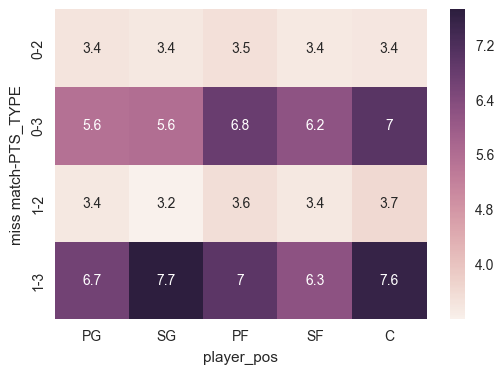

In [13]:
sns.heatmap(pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1),annot=True)

In [14]:
deff = []
for position,dataframe,def_method in zip(player_p,dataframes, def_methods):
    dftemp = dataframe[dataframe['CD_pos'] == position]
    dftemp['miss match'] = dftemp['player_pos_ID'].apply(def_method)
    deff.append(dftemp)

C:\Users\54419\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
player_PG = deff[0].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_SG = deff[1].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_SF = deff[2].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_PF = deff[3].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_C = deff[4].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])

In [16]:
pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1)

CD_pos                     PG        SG        PF        SF         C
miss match PTS_TYPE                                                  
0          2         0.470477  0.482671  0.477611  0.499021  0.482799
           3         0.353312  0.346006  0.349327  0.353909  0.348238
1          2         0.575734  0.594937  0.503473  0.475936  0.469835
           3         0.360687  0.375000  0.314727  0.332530  0.368627

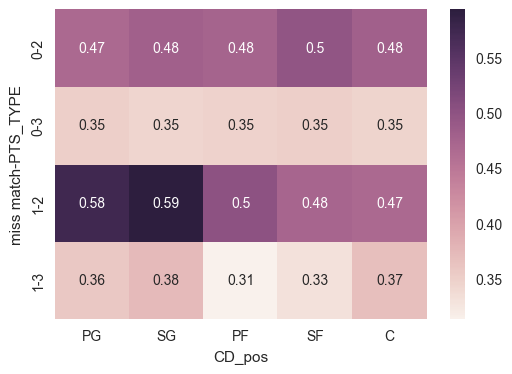

In [17]:
sns.heatmap(pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1),annot=True)

In [18]:
player_PG = deff[0].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'],aggfunc='count')
player_SG = deff[1].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'],aggfunc='count')
player_SF = deff[2].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'],aggfunc='count')
player_PF = deff[3].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'],aggfunc='count')
player_C = deff[4].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'],aggfunc='count')

In [19]:
pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1)

CD_pos                  PG    SG     PF    SF      C
miss match PTS_TYPE                                 
0          2         10077  9406  12975  9192  15348
           3          6340  5997   4085  4925   1476
1          2          2555  1027   7055  1496   4293
           3           524    32    842   830    765

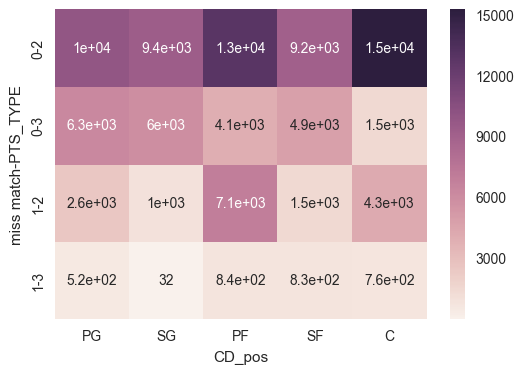

In [20]:
sns.heatmap(pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1),annot=True)

In [21]:
player_PG = deff[0].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_SG = deff[1].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_SF = deff[2].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_PF = deff[3].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])
player_C = deff[4].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['CD_pos'])

In [22]:
pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1)

CD_pos                     PG        SG        PF        SF         C
miss match PTS_TYPE                                                  
0          2         3.405121  3.471688  3.455052  3.442581  3.457864
           3         5.313738  5.725896  6.609621  5.976487  7.178726
1          2         3.763953  3.502824  3.429043  3.525602  3.241952
           3         6.696947  7.081250  6.569240  6.270602  7.583007

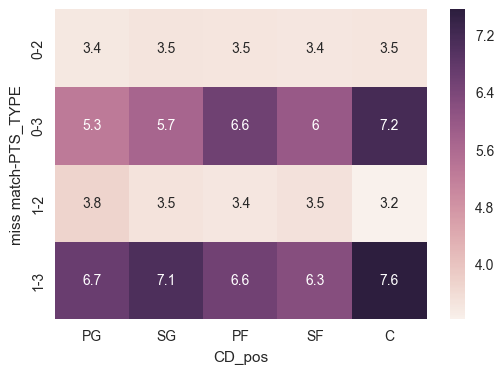

In [23]:
sns.heatmap(pd.concat([player_PG,player_SG,player_SF,player_PF,player_C],axis=1),annot=True)

In [24]:
for i in range(5):
    off[i]['team'] = off[i]['MATCHUP'].apply(lambda x: x.split('-')[1][1:4])

C:\Users\54419\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
team_stat = []
player_off = ['oPG','oSG','oSF','oPF','oC']
for i in range(5):
    temp = off[i].groupby('team').count()['miss match']
    team_stat.append(temp.rename(player_off[i]))

In [28]:
off_stat = pd.concat(team_stat,axis=1)
off_stat[np.isnan(off_stat)] = 0
off_stat['off_Sum'] = off_stat['oPG']+off_stat['oSG']+off_stat['oSF']+off_stat['oPF']+off_stat['oC']

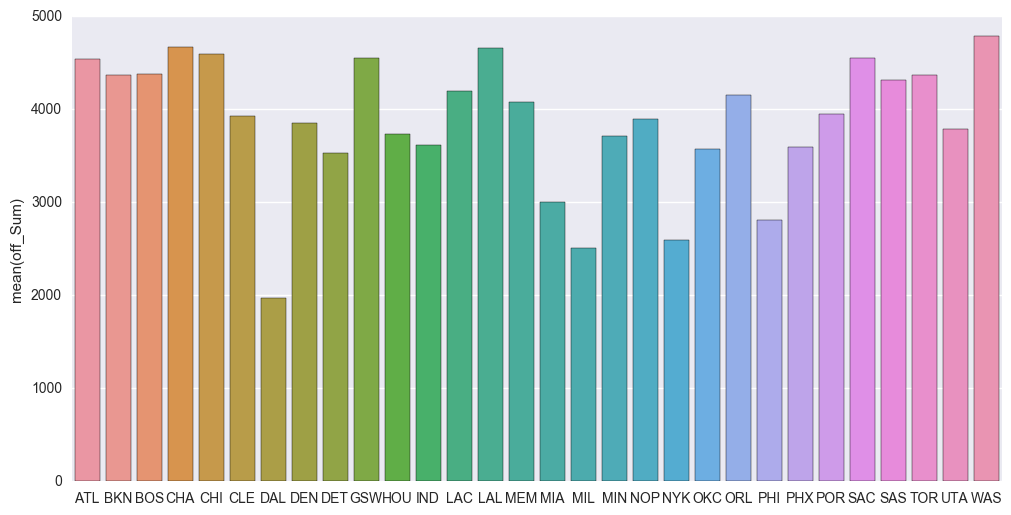

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x = off_stat.index, y = 'off_Sum',data = off_stat)

In [30]:
off_stat.sort('off_Sum',ascending=True).head(10)

C:\Users\54419\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,oPG,oSG,oSF,oPF,oC,off_Sum
DAL,431,0.0,288.0,911.0,340,1970.0
MIL,449,908.0,0.0,562.0,591,2510.0
NYK,785,0.0,235.0,954.0,623,2597.0
PHI,611,344.0,491.0,938.0,423,2807.0
MIA,1024,0.0,134.0,959.0,881,2998.0
DET,628,683.0,909.0,645.0,665,3530.0
OKC,1543,805.0,947.0,33.0,245,3573.0
PHX,1285,642.0,1367.0,0.0,299,3593.0
IND,875,0.0,982.0,979.0,782,3618.0
MIN,812,452.0,931.0,1115.0,407,3717.0


In [31]:
(off_stat['oC']/off_stat['off_Sum']).sort_values(ascending=False).head()

MIA    0.293863
CHA    0.271909
MEM    0.261648
BKN    0.256809
NYK    0.239892
dtype: float64

In [32]:
for i in range(5):
    deff[i]['team'] = deff[i]['MATCHUP'].apply(lambda x: x.split('-')[1][1:4])

C:\Users\54419\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
team_stat = []
player_deff = ['dPG','dSG','dSF','dPF','dC']
for i in range(5):
    temp = deff[i].groupby('team').count()['miss match']
    team_stat.append(temp.rename(player_deff[i]))

In [34]:
deff_stat = pd.concat(team_stat,axis=1)
deff_stat[np.isnan(off_stat)] = 0
deff_stat['deff_Sum'] = deff_stat['dPG']+deff_stat['dSG']+deff_stat['dSF']+deff_stat['dPF']+deff_stat['dC']

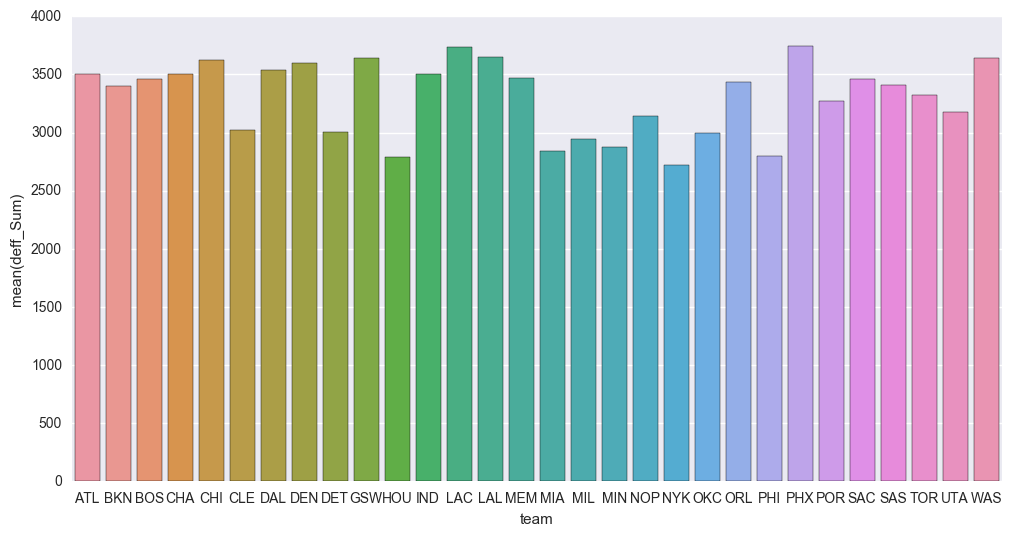

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x = deff_stat.index, y = 'deff_Sum',data = deff_stat)

In [36]:
deff_stat.sort('deff_Sum',ascending=False).head(10)

C:\Users\54419\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,dPG,dSG,dSF,dPF,dC,deff_Sum
team,,,,,,
PHX,819,692,896,636,705,3748
LAC,697,744,972,633,689,3735
LAL,637,710,888,627,788,3650
GSW,883,672,866,527,696,3644
WAS,723,569,905,626,820,3643
CHI,683,532,813,595,1001,3624
DEN,654,638,899,695,711,3597
DAL,692,697,971,589,591,3540
CHA,733,586,795,556,837,3507


In [37]:
(deff_stat['dC']/deff_stat['deff_Sum']).sort_values(ascending=False).head()

team
CHI    0.276214
ORL    0.271537
MEM    0.256410
SAC    0.248845
PHI    0.246698
dtype: float64

In [61]:
E_conference = ['BOS BKN NYK PHI TOR CHI CLE DET IND MIL ATL CHA MIA ORL WAS'.split()]
W_conference = ['DEN MIN OKC POR UTA GSW LAC LAL PHX SAC DAL HOU MEM NOP SAS'.split()]
Ec = pd.Series('E',index=E_conference)
Wc = pd.Series('W',index=W_conference)
conference=Ec.append(Wc)
conference=conference.sort_index()
conference=conference.rename('conference')

total_stat = pd.concat([off_stat,deff_stat,conference],axis=1)
total_stat.head()


,oPG,oSG,oSF,oPF,oC,off_Sum,dPG,dSG,dSF,dPF,dC,deff_Sum,conference
team,,,,,,,,,,,,,
ATL,1140,681.0,1343.0,665.0,715,4544.0,648,564,947,558,788,3505,E
BKN,1127,1104.0,656.0,360.0,1122,4369.0,708,493,801,644,756,3402,E
BOS,406,1558.0,1180.0,475.0,760,4379.0,585,576,870,605,827,3463,E
CHA,1185,1397.0,447.0,369.0,1269,4667.0,733,586,795,556,837,3507,E
CHI,1335,1095.0,1597.0,229.0,340,4596.0,683,532,813,595,1001,3624,E


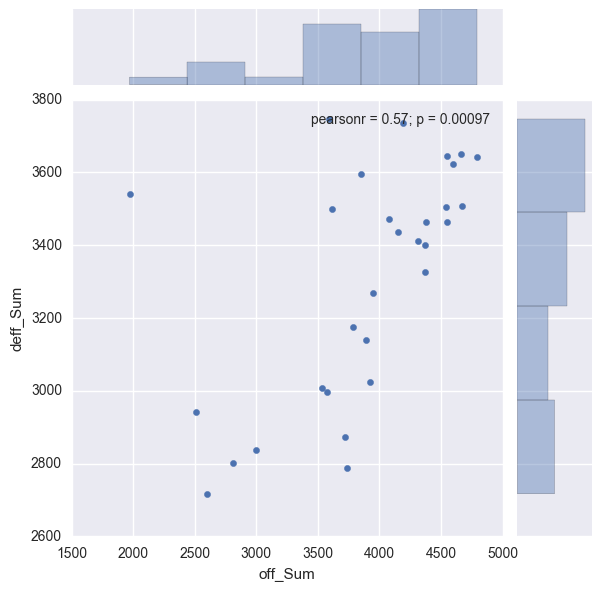

In [45]:
sns.jointplot(x='off_Sum',y='deff_Sum',data=total_stat,kind='scatter',cmap='Greys')

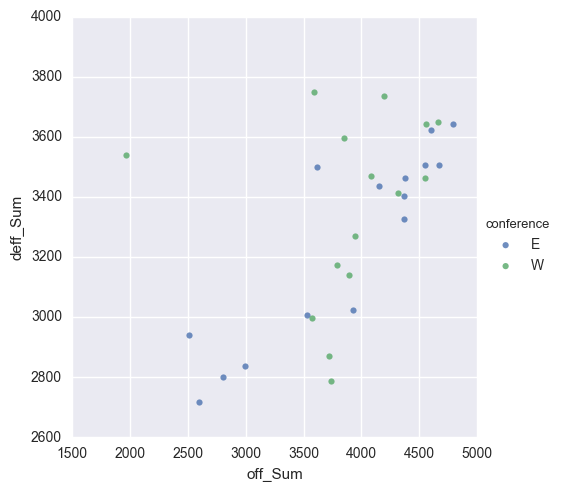

In [67]:
sns.lmplot(x='off_Sum',y='deff_Sum',hue='conference',fit_reg=False,data=total_stat)

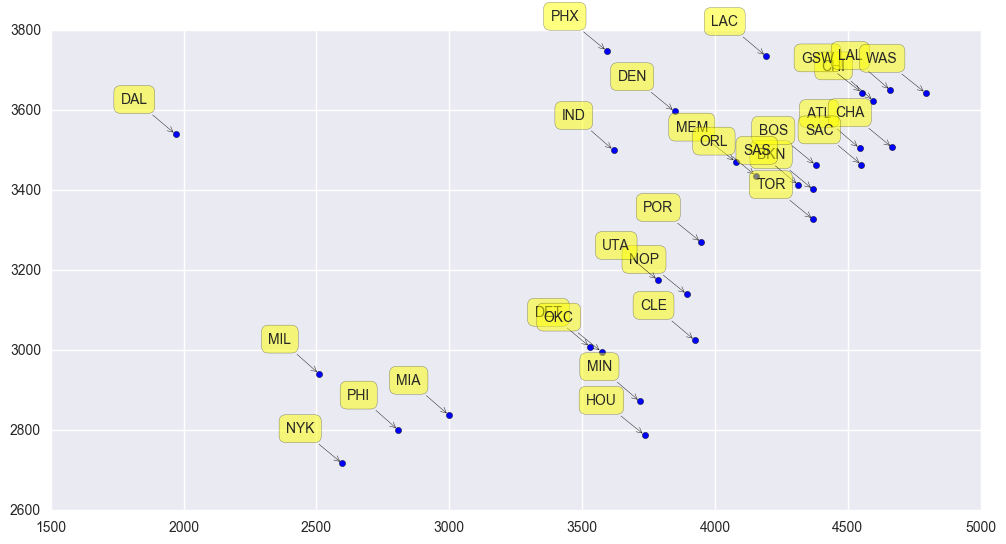

In [40]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    total_stat['off_Sum'], total_stat['deff_Sum'], marker='o',
    cmap=plt.get_cmap('Spectral'))

labels = total_stat.index
for label, x, y in zip(labels, total_stat['off_Sum'], total_stat['deff_Sum']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


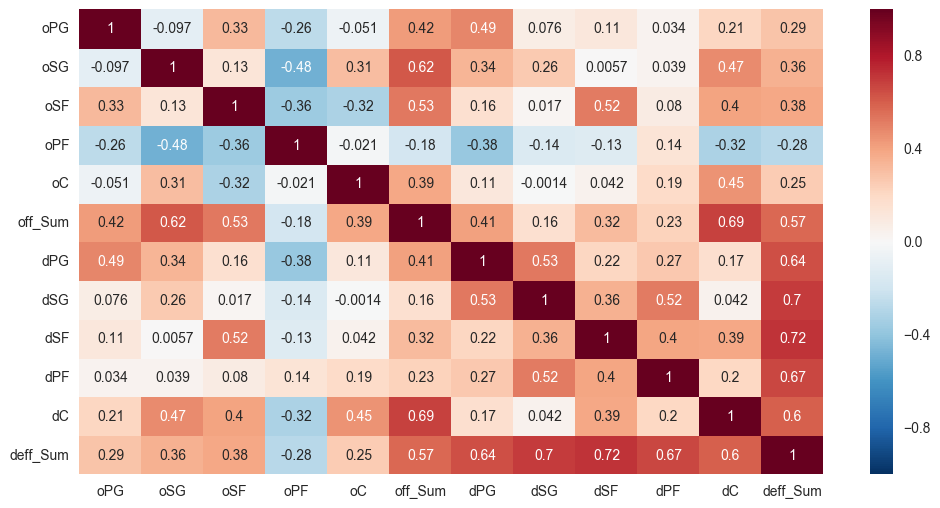

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(total_stat.corr(),annot=True,)